# Importing libraries

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

## Properties

In [2]:
#Reading the properties csv using the pandas read_csv() method
properties_raw_data = pd.read_csv("properties.csv", index_col = 0)

In [3]:
#Checking data types
properties_raw_data.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

## Customers

In [4]:
#Reading the customers csv using the pandas read_csv() method
Customers_raw_data = pd.read_csv("customers.csv", index_col = 0)

In [5]:
#Checking data types
Customers_raw_data.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

# Data cleaning and preprocessing

## Properties

In [6]:
#Creating a checkpoint by assigning the copy of original data to a new variable
properties = properties_raw_data.copy()

In [7]:
#Examining statistical summary of all varibales
properties.describe(include = "all")

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [8]:
#Checking the column values
properties.columns.array

<PandasArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [9]:
#Renaming id column due to encoding issue
properties = properties.rename(columns = {"\ufeffid" : "id"})
properties.columns.array

<PandasArray>
[        'id',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

### Renaming categorical type of data to str

In [10]:
properties["id"] = properties["id"].astype(str)

In [11]:
properties["building"] = properties["building"].astype(str)

In [12]:
properties["property#"] = properties["property#"].astype(str)

In [13]:
#Checking the datatype modification
properties.dtypes

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [14]:
properties.describe(include = "all")

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


In [15]:
properties["date_sale"].unique()

# My investigation reveals multiple problems:

# 1. Some entries are '#NUM!', a placeholder for missing or erroneous values, carried over from an Excel file.

# 2. Every date is listed as the first of the month, regardless of the actual month. 
# This suggests that the data may only include information about the month of the transaction, rather than the precise date.

# 3. The 'date_sale' Series is currently classified as an 'object' type, 
# meaning the dates are treated as strings instead of actual dates.

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [16]:
# addressed these issues step by step.
# The first task is to replace the Excel-specific missing value indicator '#NUM!' with a format 
# that pandas can understand as a null value, i.e., 'pd.NA'.
# I implemented this using the 'np.where' function from the NumPy library.
properties["date_sale"] = np.where(properties["date_sale"] == "#NUM!", pd.NA, properties["date_sale"])
# Upon rechecking the unique entries, we can observe that the '#NUM!' placeholders have been successfully replaced with 'pd.NA'.
properties["date_sale"].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [17]:
# Next step, converted the data type to date type
properties["date_sale"] = pd.to_datetime(properties["date_sale"])

In [18]:
#Checking the changes
properties["date_sale"]
#the datetime function converted the pandas missing values pd.NA to Nat (Not a time)

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [19]:
# After the conversion, the total count of 'date_sale' entries is now 195
properties.describe(include = "all", datetime_is_numeric=True)

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


In [20]:
# unique values count dropped to 43.
# This change is due to the replacement of empty strings with 'NaT', 
# resulting in one less unique value and a total of 72 (267-195) missing values.
properties["date_sale"].nunique()

43

In [21]:
properties["type"].unique()

array(['Apartment', 'Office'], dtype=object)

In [22]:
# Now, moving to the 'type' column. 
# Standardized it further by converting all its entries to lowercase using the .lower() method
properties["type"] = properties["type"].str.lower()

In [23]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [24]:
# Checking for more mismatch in the data types
# Price data type should be float instead of object
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [25]:
# The '$' symbol in the 'price' column is causing it to be treated as a string. 
# To fix this, i'll strip the '$' sign and create a new Series 'price$'.
properties["price $"] = properties["price"].str.strip('$')

In [26]:
# Removing the thousands separator ',' since its not allowing price $ to change the data type to float
properties["price $"] = properties["price $"].replace(',','',regex = True)

In [27]:
properties

,id,building,date_sale,type,property#,area,price,status,customerid,price $
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,"$322,610.74",-,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,"$279,191.26",-,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,"$287,996.53",-,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,"$365,868.78",-,NaN,365868.78


In [28]:
#finally changed the data type
properties["price $"] = properties["price $"].astype(float)

In [29]:
#Dropped price column
properties = properties.drop(['price'], axis = 1)

In [30]:
# Checking for more mismatch in the data types
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price $              float64
dtype: object

In [31]:
# Now, examining status column
properties["status"].unique()

array([' Sold ', '-'], dtype=object)

In [32]:
# To ensure uniformity and ease of analysis, i removed the surrounding spaces using the .strip() method 
# and converted the text to lowercase.
properties["status"] = properties["status"].str.strip()

In [33]:
properties["status"] = properties["status"].str.lower()

In [34]:
# Confirming the changes
properties["status"].unique()

array(['sold', '-'], dtype=object)

In [35]:
#Renaming the column to sold
properties = properties.rename(columns = {"status" : "sold"})

In [36]:
# changed its values to 1s (for sold properties) and 0s (for unsold properties), essentially creating a binary classification using .map method
properties["sold"] = properties["sold"].map({"sold" : 1, "-" : 0})

In [37]:
# Confirming the changes
properties["sold"].unique()

array([1, 0], dtype=int64)

In [38]:
# Checking for more mismatch in the data types
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
sold                   int64
customerid            object
price $              float64
dtype: object

In [39]:
# Checking missing values
properties.isna().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price $        0
dtype: int64

In [40]:
# Viewing properties dataset after data cleaning
properties

,id,building,date_sale,type,property#,area,sold,customerid,price $
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [41]:
#Creating a checkpoint by assigning the copy of original data to a new variable
customers = Customers_raw_data.copy()

In [42]:
#Checking the column values
customers.columns.array

<PandasArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [43]:
#Renaming id column due to encoding issue
customers = customers.rename(columns = {"\ufeffcustomerid" : "customerid"})

In [44]:
# Checking the changes
customers.columns.array

<PandasArray>
[       'customerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [45]:
#Examining statistical summary of all varibales
customers.describe(include = "all")

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [46]:
#Checking the data types
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [47]:
# Checking missing values
customers.isna().sum()

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [48]:
customers["entity"].unique()

array(['Individual', 'Company'], dtype=object)

In [49]:
# To make 'entity' a Boolean-like variable (at least conceptually), mapped 'Individual' to 1 and 'Company' to 0.
customers["entity"] = customers["entity"].map({'Individual':1,'Company':0})
customers["entity"]

0      1
1      1
2      1
3      1
4      0
      ..
157    1
158    1
159    1
160    1
161    1
Name: entity, Length: 162, dtype: int64

In [50]:
#examining the 'sex' variable.
customers["sex"].unique()

array(['F', 'M', nan], dtype=object)

In [51]:
#mapped 'F', 'M', "" to '1', '0', pd.NA
customers["sex"] = customers["sex"].map({"F" : '1', "M" : '0', "" : pd.NA})

In [52]:
# Checking the changes
customers["sex"].unique()

array(['1', '0', nan], dtype=object)

In [53]:
#lowering values of purpose
customers["purpose"] = customers["purpose"].str.lower()

In [54]:
#lowering values of source
customers["source"] = customers["source"].str.lower()

In [55]:
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


In [56]:
#Moving to mortgage mapped 'Yes', 'No' to '1', '0'
customers["mortgage"] = customers["mortgage"].map({"Yes" : 1, "No" : 0})

In [57]:
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website


In [58]:
#Created a new variable "full name" by Combining "name" and "surname" columns 
customers["full name"] = customers["name"] +" "+ customers["surname"]
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,1,Emmy,Singh,12/3/1979,1,USA,Virginia,investment,3,1,agency,Emmy Singh
158,C0138,1,Colin,Campos,4/14/1942,0,USA,California,home,3,0,website,Colin Campos
159,C0113,1,Anya,Stephenson,6/11/1959,1,USA,California,home,4,0,website,Anya Stephenson
160,C0147,1,Parker,Poole,11/10/1951,0,USA,California,home,5,0,website,Parker Poole


In [59]:
# Dropped "name" and "surname" columns
customers = customers.drop(["name","surname"], axis = 1)

In [60]:
#Changed "birth_date" data type to date time
customers["birth_date"] = pd.to_datetime(customers["birth_date"])
customers.dtypes

customerid                   object
entity                        int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full name                    object
dtype: object

In [61]:
customers.head()

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


# Combine two tables

In [62]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [63]:
customers.head()

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [64]:
#Merging two tables using customerid column with left join of properties
pd.merge(properties,customers, on = "customerid", how = "left")

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# The merge did not work as intended.
# There is a problem with the key, so investigated further.
properties["customerid"].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [66]:
#the two datasets differ - there are unexpected and unnecessary spaces.
customers["customerid"].unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [67]:
# Let's trim the unnecessary white space from 'customerid' in the properties dataframe.
properties["customerid"] = properties["customerid"].str.strip()

In [68]:
# Let's trim the unnecessary white space from 'customerid' in the customers dataframe.
customers["customerid"] = customers["customerid"].str.strip()

In [69]:
# To ensure a successful merge, i must ensure that 'customerid' in the customers table has only unique values.
customers.count()

customerid           162
entity               162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full name            162
dtype: int64

In [70]:
# count of unique entries in the 'customerid' column of the properties dataframe.
properties["customerid"].nunique()

162

In [71]:
# Replacing empty space in 'customerid' in the 'properties' dataframe with 'NA'. This corresponds to properties that are not yet purchased.
properties["customerid"] = np.where(properties["customerid"] == "", pd.NA, properties["customerid"])

In [72]:
#Created real_estate_dat merging two tables using customerid column with left join of properties
real_estate_data = pd.merge(properties,customers, on = "customerid", how = "left")

In [73]:
real_estate_data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [74]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Replacing missing values
real_estate_data.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price $                     float64
entity                      float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full name                    object
dtype: object

# Statistics

In [77]:
# Creating a checkpoint
data = real_estate_data.copy()

In [78]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [79]:
# Checking statistics of all variables
data.describe(include = "all", datetime_is_numeric=True)

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


# Breakdowns by building

I examined:

Breakdown of totals by building (frequency distribution by building)

Breakdown of averages by building

In [80]:
data["building"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

#### Breakdown of totals by building

In [81]:
columns_of_interest = ["building", "sold", "mortgage"]

In [82]:
totals_by_building = data[columns_of_interest].groupby("building").sum()
totals_by_building

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


#### Breakdown of averages by building

In [83]:
columns_of_interest = ["building", "area", "price $", "deal_satisfaction"]

In [84]:
averages_by_building = data[columns_of_interest].groupby("building").mean()
averages_by_building

,area,price $,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


# Breakdowns by country and state

Country:

Breakdown of totals by country (frequency distribution by country)

Breakdown of averages by country


State:

Frequency distribution by state 

Relative frequency by state 

Cumulative frequency by state

### Breakdown of totals by country

In [85]:
columns_of_interest = ["country", "sold", "mortgage"]
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [86]:
data["country"].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [87]:
object_columns = data.select_dtypes(["object"]).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full name'],
      dtype='object')

In [88]:
#Stripped extra spaces from the values
data[object_columns] = data[object_columns].apply(lambda x : x.str.strip())

In [89]:
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


### Breakdown of averages by country

In [90]:
columns_of_interest = ["country", "area", "deal_satisfaction", "price $"]
averages_by_country = data[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price $
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Frequency distribution by state

In [91]:
columns_of_interest = ["state", "sold", "mortgage"]
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state
# Not all entries have a 'state' value, This could cause complications if i didn't previously map the empty strings to NA.

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [92]:
totals_by_state.sold.sum()

181

In [93]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [94]:
data["state"].unique()

array(['California', 'Virginia', 'Arizona', 'Oregon', 'Nevada',
       'Colorado', 'Utah', nan, 'Kansas', 'Wyoming'], dtype=object)

In [95]:
data["state"] = np.where(data["state"] == "", pd.NA, data["state"])
data["state"] = np.where(data["country"] != "USA", pd.NA, data["state"])

In [96]:
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [97]:
totals_by_state.sold.sum()

177

In [98]:
columns_of_interest = ["state","sold"]
sold_by_state = data[columns_of_interest].groupby("state").sum()

In [99]:
sold_by_state = sold_by_state.sort_values("sold", ascending = False)

In [100]:
sold_by_state = sold_by_state.rename(columns = {"sold" : "frequency"})

In [101]:
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [102]:
sold_by_state["relative_frequency"] = sold_by_state["frequency"]/sold_by_state["frequency"].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [103]:
sold_by_state["cumulative frequency"] = sold_by_state["relative_frequency"].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [104]:
sold_by_state

,frequency,relative_frequency,cumulative frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


# Data analysis

## Customers age

In [105]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [106]:
data["age_at_purchase"] = (data["date_sale"] - data["birth_date"]).dt.days
data["age_at_purchase"]

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [107]:
data["age_at_purchase"] = data["age_at_purchase"]/365
data["age_at_purchase"]

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [108]:
data["age_at_purchase"] = data["age_at_purchase"].apply(lambda x : np.floor(x))

In [109]:
data["age_at_purchase"]

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase, Length: 267, dtype: float64

# Create age intervals

In [110]:
data["age_intervals"] = pd.cut(data["age_at_purchase"], bins = 10, precision = 0)
data["age_intervals"]

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 30.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_intervals, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 30.0] < (30.0, 36.0] < (36.0, 42.0] ... (53.0, 59.0] < (59.0, 65.0] < (65.0, 70.0] < (70.0, 76.0]]

## Breakdown by age interval

In [111]:
columns_of_interest = ["age_intervals", "sold"]
sold_by_age = data[columns_of_interest].groupby("age_intervals").sum()
sold_by_age

,sold
age_intervals,
"(19.0, 25.0]",4
"(25.0, 30.0]",16
"(30.0, 36.0]",29
"(36.0, 42.0]",30
"(42.0, 48.0]",24
"(48.0, 53.0]",22
"(53.0, 59.0]",19
"(59.0, 65.0]",12
"(65.0, 70.0]",18


# Analysis of the price of the properties

In [112]:
data["price_intervals"] = pd.cut(data["price $"], bins =10)
data["price_intervals"]

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_intervals, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

## Total number of properties

In [113]:
columns_of_interest = ["price_intervals", "sold"]
all_properties_by_price = data[columns_of_interest].groupby("price_intervals").count()
all_properties_by_price = all_properties_by_price.rename(columns = {"sold" : "count"})
all_properties_by_price

,count
price_intervals,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


## Total number of sold properties

In [114]:
columns_of_interest = ["price_intervals", "sold"]
number_of_sold_properties = data[columns_of_interest].groupby("price_intervals").sum()
number_of_sold_properties

,sold
price_intervals,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


# Total unsold properties

In [115]:
all_properties_by_price["unsold_properties"] = all_properties_by_price["count"] - number_of_sold_properties["sold"]
all_properties_by_price["sold_properties"] = number_of_sold_properties["sold"]
all_properties_by_price

,count,unsold_properties,sold_properties
price_intervals,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


# Relationship between age and price

In [116]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,country,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]"


## Filter sold properties

In [117]:
data_sold = data[data["sold"] == 1]
data_sold

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,country,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1022,1,2005-07-01,apartment,22,743.09,1,C0174,210745.17,0.0,...,USA,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,"(201705.604, 243776.371]"
192,1028,1,2005-07-01,apartment,28,1160.36,1,C0174,331154.88,0.0,...,USA,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,"(327917.905, 369988.672]"
193,1034,1,2005-07-01,apartment,34,625.80,1,C0174,204434.68,0.0,...,USA,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,"(201705.604, 243776.371]"
194,1037,1,2005-07-01,apartment,37,756.21,1,C0174,189194.31,0.0,...,USA,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,"(159634.837, 201705.604]"


In [118]:
data_sold = data_sold[data_sold["entity"] == 1.0]
data_sold

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,country,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3040,3,2007-06-01,apartment,40,670.89,1,C0103,204292.49,1.0,...,USA,Oregon,investment,2.0,0.0,website,Jamal Mueller,70.0,"(65.0, 70.0]","(201705.604, 243776.371]"
174,1023,1,2005-04-01,apartment,23,782.25,1,C0021,261579.89,1.0,...,Russia,<NA>,investment,3.0,0.0,website,Kaylin Villarreal,72.0,"(70.0, 76.0]","(243776.371, 285847.138]"
175,3009,3,2006-05-01,apartment,9,743.41,1,C0148,222867.42,1.0,...,USA,California,investment,5.0,1.0,agency,Myah Roman,73.0,"(70.0, 76.0]","(201705.604, 243776.371]"
176,3052,3,2006-03-01,apartment,52,923.21,1,C0172,291494.36,1.0,...,USA,California,home,4.0,1.0,agency,Henry Kennedy,72.0,"(70.0, 76.0]","(285847.138, 327917.905]"


In [119]:
data_sold[["age_at_purchase", "price $"]]

,age_at_purchase,price $
0,19.0,246172.68
1,22.0,246331.90
2,21.0,209280.91
3,21.0,452667.01
4,25.0,467083.31
...,...,...
173,70.0,204292.49
174,72.0,261579.89
175,73.0,222867.42
176,72.0,291494.36


## Covariance of age and price

In [120]:
np.cov(data_sold["age_at_purchase"], data_sold["price $"])

array([[ 1.67866438e+02, -1.79316770e+05],
       [-1.79316770e+05,  6.16619957e+09]])

## Correlation of age and price

In [121]:
np.corrcoef(data_sold["age_at_purchase"], data_sold["price $"])

array([[ 1.        , -0.17625043],
       [-0.17625043,  1.        ]])

In [122]:
data_sold_no_na = data_sold.dropna()

In [123]:
np.corrcoef(data_sold_no_na["age_at_purchase"], data_sold_no_na["price $"])

array([[ 1.        , -0.19713128],
       [-0.19713128,  1.        ]])

In [124]:
data[["age_at_purchase", "price $"]].corr()

,age_at_purchase,price $
age_at_purchase,1.00000,-0.17625
price $,-0.17625,1.00000


# Data visualization

## Deal satisfaction across countries

In [125]:
averages_by_country

,area,deal_satisfaction,price $
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

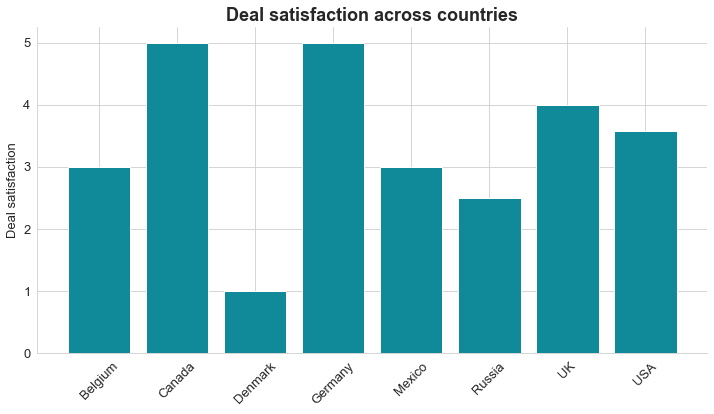

In [127]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))

plt.bar(x = averages_by_country.index,
        height = averages_by_country["deal_satisfaction"],
        color = "#108A99")

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Deal satisfaction across countries", fontsize = 18, fontweight = "bold")
plt.ylabel("Deal satisfaction", fontsize = 13)

sns.despine()
plt.savefig("deal_satisfaction_by_country_bar_chart.png") # export chart as a picture
plt.show()

# Customer Age Distribution

In [128]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,country,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"


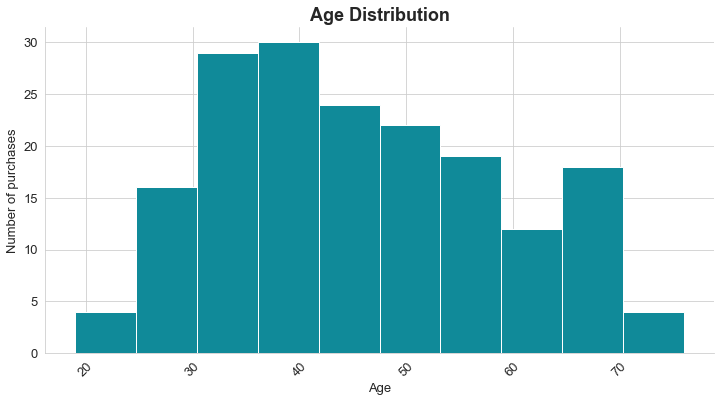

In [129]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))

plt.hist(data["age_at_purchase"],
         bins = 10,
         color = "#108A99")

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Age Distribution", fontsize = 18, fontweight = "bold")
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Number of purchases", fontsize = 13)

sns.despine()
plt.savefig("age_distribution_histogram.png") # export chart as a picture
plt.show()

# Segmentation by state

In [130]:
sold_by_state

,frequency,relative_frequency,cumulative frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [131]:
from matplotlib.ticker import PercentFormatter

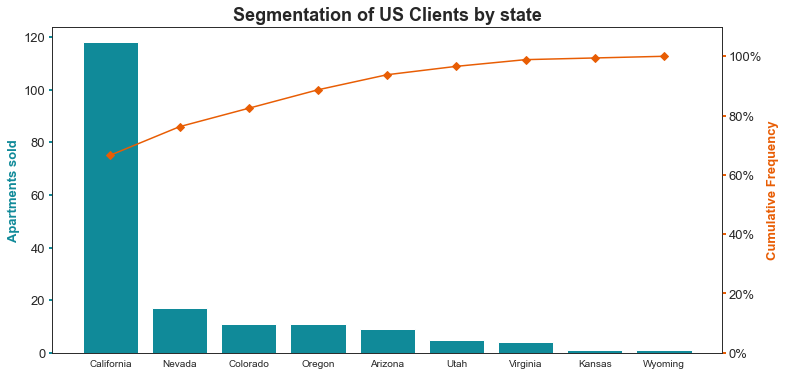

In [132]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(sold_by_state.index,
       sold_by_state["frequency"],
       color = "#108A99")

ax.set_ylabel("Apartments sold",
              weight = "bold",
              fontsize = 13,
              color = "#108A99")

ax.tick_params(axis = "y",
               width = 2,
               color = "#108A99",
               labelsize = 13)

ax2 = ax.twinx()
ax2.set_ylim(0,1.1)
ax2.yaxis.set_major_formatter(PercentFormatter (xmax = 1.0))

ax2.plot(sold_by_state.index,
         sold_by_state["cumulative frequency"],
         color ="#E85D04",
         marker ="D")
ax2.set_ylabel("Cumulative Frequency",
               fontsize = 13,
               weight = "bold",
               color = "#E85D04")
ax2.tick_params(axis = "y",
                width = 2,
                labelsize = 13,
                color = "#E85D04")

plt.title("Segmentation of US Clients by state", fontweight = "bold", fontsize =18)

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

plt.show()

# Total sales per year

In [133]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,country,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"


In [134]:
#convert the year portion of the date into an integer.
data['date_sale'][0].year

2005

In [135]:
# do that for the whole series and save the year in a separate column
data["year_sale"] = data["date_sale"].apply(lambda x : x.year)
data["year_sale"]

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [136]:
# need to convert the 'year_sale' variable type from float to int as fractional years don't accurately represent our data.
# To modify the data type, employ the 'astype' method. Since this function cannot handle missing values, we initially replace all NAs with zeros.
data["year_sale"] = data["year_sale"].fillna(0).astype(int)
data["year_sale"]

0      2005
1      2005
2      2007
3      2007
4      2004
       ... 
262       0
263       0
264       0
265       0
266       0
Name: year_sale, Length: 267, dtype: int32

In [137]:
# Subsequently, convert all zeros back to NA, restoring dataset's missing value representation.
data["year_sale"] = data["year_sale"].replace({0 : pd.NA})
data["year_sale"]

0      2005
1      2005
2      2007
3      2007
4      2004
       ... 
262    <NA>
263    <NA>
264    <NA>
265    <NA>
266    <NA>
Name: year_sale, Length: 267, dtype: object

In [138]:
columns_of_interest = ["year_sale", "price $"]
revenue_per_year = data[columns_of_interest].groupby("year_sale").sum()
revenue_per_year

,price $
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


In [139]:
revenue_per_year = revenue_per_year.rename(columns = {"price $" : "revenue"})
revenue_per_year

,revenue
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


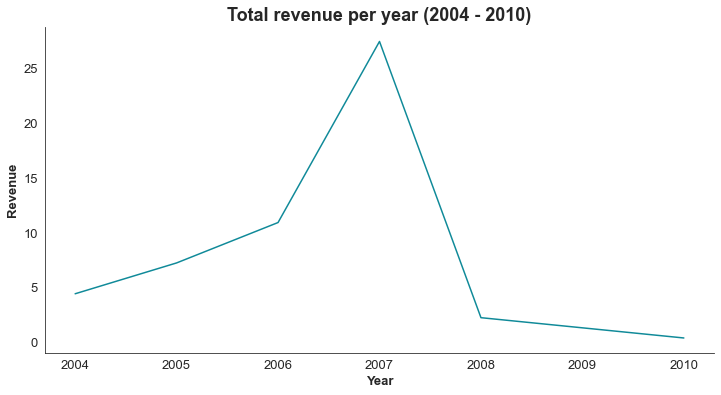

In [140]:
sns.set_style("white") # override the default matplotlib style, opting for a white grid layout.

plt.figure(figsize=(12,6)) # generate a figure that aligns aesthetically with other visualizations.

plt.plot(revenue_per_year.index, # A line chart will be constructed to represent revenue per year.
         revenue_per_year["revenue"]/1000000,
         color = "#108A99")

# ensure our visualization includes essential chart elements like title, labels, and legends.
plt.title("Total revenue per year (2004 - 2010)", fontsize = 18, weight ="bold")
plt.xlabel("Year", fontsize = 13, weight = "bold")
plt.ylabel("Revenue", fontsize = 13, weight = "bold")
plt.xticks(fontsize = 13) # format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # format and adjust the orientation of labels on the y-axis.

sns.despine() # remove the top and right borders of the chart for a cleaner look.

# save the visualization as an image file.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() # display the visualization.

In [141]:
revenue_per_year_adj = revenue_per_year.copy()
# Adding a new row for the year 2009 with 0 revenue.
revenue_per_year_adj = revenue_per_year_adj.append({"revenue" : 0.00}, ignore_index = True)
# Adjusting the index to include 2009.
revenue_per_year_adj.index = ["2004","2005","2006","2007","2008","2010","2009"]
# Reordering the dataframe to chronologically arrange the years.
revenue_per_year_adj = revenue_per_year_adj.loc[["2004","2005","2006","2007","2008","2009","2010"]]
revenue_per_year_adj

,revenue
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2009,0.00
2010,357538.20


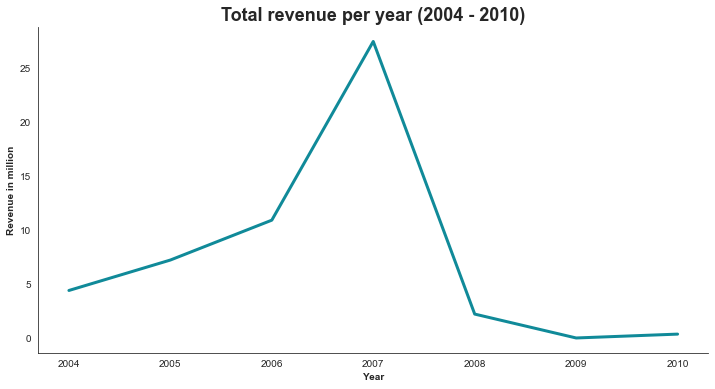

In [142]:
sns.set_style("white") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.
plt.figure(figsize = (12,6)) # Initiate a figure of appropriate size to match our other figures.
# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj["revenue"]/1000000,  # revenue in millions
         color = "#108A99",
         linewidth = 3)
# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total revenue per year (2004 - 2010)", fontsize = 18, fontweight = "bold")
plt.xlabel("Year", fontweight = 13, weight = "bold") # Format the labels for the x-axis.
plt.ylabel("Revenue in million", fontweight = 13, weight = "bold") # Format the labels for the y-axis.
sns.despine() # Remove the top and right border of the chart for a cleaner look.
plt.savefig("total_revenue_per_year_in_M_line_chart_with_2009.png") # Export the chart as an image file.
plt.show() # Display the chart.

# Yearly sales distribution across buildings

In [143]:
#Created a checkpoint
data_stacked_area = data.copy()
data_stacked_area

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,state,purpose,deal_satisfaction,mortgage,source,full name,age_at_purchase,age_intervals,price_intervals,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]",NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]",NaN


In [144]:
# Goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# So i split this into separate entities, resulting in five dummy variables.
building_dummies = pd.get_dummies(data_stacked_area["building"])
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [145]:
# incorporated these dummy variables into main dataframe.
data_stacked_area = pd.concat((data_stacked_area,building_dummies), axis = 1)
data_stacked_area

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,full name,age_at_purchase,age_intervals,price_intervals,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,"(243776.371, 285847.138]",NaN,0,0,0,0,1
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,"(327917.905, 369988.672]",NaN,0,0,0,0,1


In [146]:
# Renaming appropriately
data_stacked_area = data_stacked_area.rename(columns = {"1" : "building 1",
                                                        "2" : "building 2",
                                                        "3" : "building 3",
                                                        "4" : "building 4",
                                                        "5" : "building 5"})
data_stacked_area

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,full name,age_at_purchase,age_intervals,price_intervals,year_sale,building 1,building 2,building 3,building 4,building 5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,"(243776.371, 285847.138]",NaN,0,0,0,0,1
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,"(327917.905, 369988.672]",NaN,0,0,0,0,1


In [147]:
#filtered out only the sold apartments
data_stacked_area = data_stacked_area[data_stacked_area["sold"] == 1]

In [148]:
data_stacked_area

,id,building,date_sale,type,property#,area,sold,customerid,price $,entity,...,full name,age_at_purchase,age_intervals,price_intervals,year_sale,building 1,building 2,building 3,building 4,building 5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1022,1,2005-07-01,apartment,22,743.09,1,C0174,210745.17,0.0,...,Marleez Co,NaN,NaN,"(201705.604, 243776.371]",2005,1,0,0,0,0
192,1028,1,2005-07-01,apartment,28,1160.36,1,C0174,331154.88,0.0,...,Marleez Co,NaN,NaN,"(327917.905, 369988.672]",2005,1,0,0,0,0
193,1034,1,2005-07-01,apartment,34,625.80,1,C0174,204434.68,0.0,...,Marleez Co,NaN,NaN,"(201705.604, 243776.371]",2005,1,0,0,0,0
194,1037,1,2005-07-01,apartment,37,756.21,1,C0174,189194.31,0.0,...,Marleez Co,NaN,NaN,"(159634.837, 201705.604]",2005,1,0,0,0,0


In [149]:
# to make the breakdown by year and by bulding i included the 'year_sale' variable and all the bulding dummies
columns_of_interest = ["year_sale","building 1","building 2","building 3","building 4","building 5"]
stacked_area = data_stacked_area[columns_of_interest].groupby("year_sale").sum()
stacked_area

,building 1,building 2,building 3,building 4,building 5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


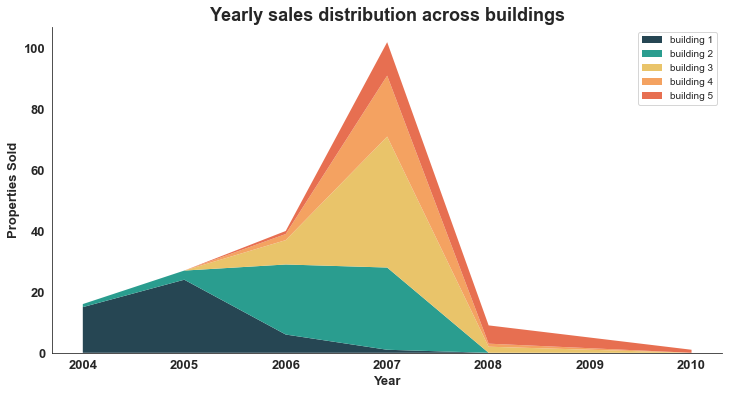

In [150]:
# Defined a list of labels for the legend matching the order of the stacked area plot categories.
labels = ["building 1", "building 2", "building 3", "building 4", "building 5"]
# Used seaborn's 'whitegrid' style for a clean background and grid lines.
sns.set_style("white")
# Created a figure that aligns with the dimensions of previous figures.
plt.figure(figsize = (12,6))
# Generated the stacked area plot.
plt.stackplot(stacked_area.index, # The x-axis uses the index (the year).
              stacked_area["building 1"],
              stacked_area["building 2"],
              stacked_area["building 3"],
              stacked_area["building 4"],
              stacked_area["building 5"],
              colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51'],
              edgecolor = "none")

# Set the title for the chart.
plt.title("Yearly sales distribution across buildings", fontsize = 18, fontweight = "bold")

# Formatted the ticks and added a legend.
plt.xticks(fontsize = 13, weight = "bold") # Formatted the x-axis labels.
plt.yticks(fontsize = 13, weight = "bold") # Formatted the y-axis labels.
plt.xlabel("Year", fontsize = 13, weight = "bold")
plt.ylabel("Properties Sold", fontsize = 13, weight = "bold")
plt.legend(labels = labels, loc = "upper right") # Added a legend, specifying its position on the chart.

sns.despine() # Removed the top and right borders of the chart for a clean appearance.

plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png") # Saved the chart as an image

plt.show() # Display the plot.

In [151]:
# To include 2009 in the graph, I adjusted the dataframe.

# Copied the original dataframe to maintain its integrity.
stacked_area_adj = stacked_area.copy()
# Appended a new row for 2009 with 0 values for all buildings as there were no sales.
stacked_area_adj = stacked_area_adj.append({"building 1" : 0,
                                            "building 2" : 0,
                                            "building 3" : 0,
                                            "building 4" : 0,
                                            "building 5" : 0},
                                            ignore_index = True)

# Adjusted the index to include 2009.
stacked_area_adj.index = ["2004", "2005","2006", "2007","2008", "2010", "2009"]
stacked_area_adj = stacked_area_adj.loc[["2004", "2005","2006", "2007","2008", "2009", "2010"]]

stacked_area_adj

,building 1,building 2,building 3,building 4,building 5
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2009,0,0,0,0,0
2010,0,0,0,0,1


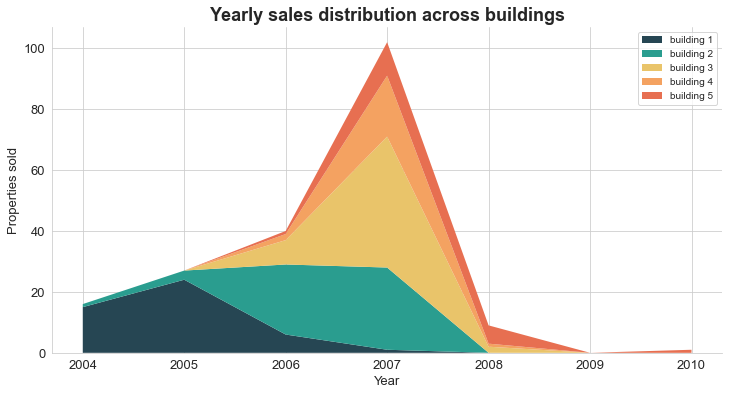

In [152]:
# Used seaborn's 'whitegrid' style for a clean background and grid lines.
sns.set_style("whitegrid")
# Assigned unique colors to each building for differentiation.
colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51']
# Created a figure that aligns with the dimensions of previous figures.
plt.figure(figsize = (12,6))
# Generated the stacked area plot.
plt.stackplot(stacked_area_adj.index, # The x-axis uses the index (the year).
              stacked_area_adj["building 1"],
              stacked_area_adj["building 2"],
              stacked_area_adj["building 3"],
              stacked_area_adj["building 4"],
              stacked_area_adj["building 5"],
              colors = colors,
              edgecolor = "none")

# Set the title for the chart.
plt.title("Yearly sales distribution across buildings", weight = "bold", fontsize = 18)

# Formatted the ticks and added a legend.
plt.xticks(stacked_area_adj.index,fontsize = 13) # Formatted the x-axis labels.
plt.yticks(fontsize = 13) # Formatted the y-axis labels.
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Properties sold", fontsize = 13) 
plt.legend(labels = labels, loc = "upper right") # Added a legend, specifying its position on the chart.

sns.despine() # Removed the top and right borders of the chart for a clean appearance.

plt.savefig("Total_sales_per_year_per_building_stacked_area_chart_v2.png") # Saved the chart as an image

plt.show() # Display the chart.